In [55]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import  matplotlib.pyplot as plt

In [32]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [12]:
sample_idx

58553

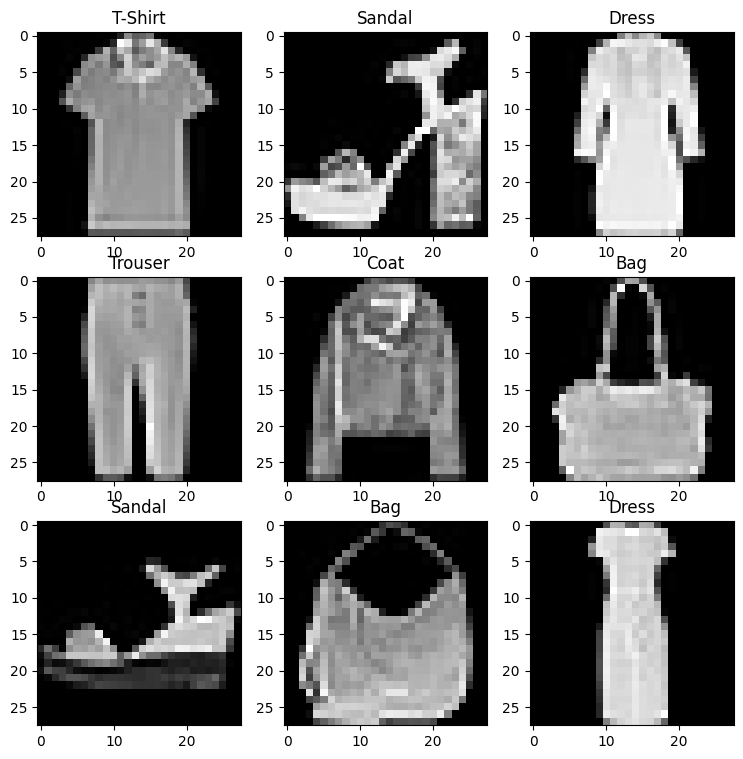

In [26]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(9, 9))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), (1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.imshow(img.squeeze(), cmap='gray')

plt.show()


In [29]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [34]:
from torch.utils.data import DataLoader

In [35]:
train_dataloader = DataLoader(training_data, batch_size=50, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=50, shuffle=True)

In [37]:
train_features, train_label = next(iter(train_dataloader))

torch.Size([28, 28]) 2
Pullover


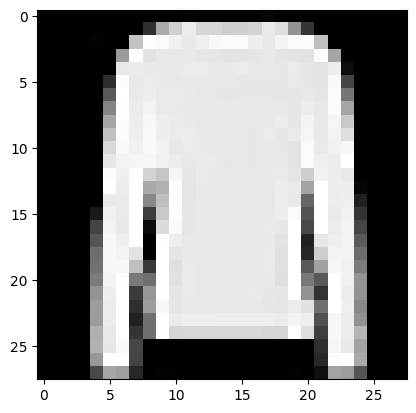

In [50]:
image = train_features[0].squeeze()
label = train_label[0].item()
print(image.shape, label)

plt.imshow(image, cmap='gray')
print(labels_map[label])

In [72]:
input = torch.zeros(3)
index = torch.LongTensor([1,0,2])
input.scatter_(dim=0, index=index, src=torch.Tensor([10, 20, 30]))
            

tensor([20., 10., 30.])

In [69]:
index

tensor([1, 0, 2])

In [86]:
import torch

# Create a tensor
tensor = torch.zeros(3, 5)  # Tensor of shape (3, 5) filled with zeros

# Indices to update
indices = torch.tensor([[0], [1], [2]])
# Values to scatter at those indices
values = torch.tensor([1.0, 2.0, 3.0])

tensor.scatter_(-1, indices, values)  # Scatter values along axis 0

print(tensor)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [84]:
tensor.scatter_?

Docstring:
scatter_(dim, index, src, reduce=None) -> Tensor

Writes all values from the tensor :attr:`src` into :attr:`self` at the indices
specified in the :attr:`index` tensor. For each value in :attr:`src`, its output
index is specified by its index in :attr:`src` for ``dimension != dim`` and by
the corresponding value in :attr:`index` for ``dimension = dim``.

For a 3-D tensor, :attr:`self` is updated as::

    self[index[i][j][k]][j][k] = src[i][j][k]  # if dim == 0
    self[i][index[i][j][k]][k] = src[i][j][k]  # if dim == 1
    self[i][j][index[i][j][k]] = src[i][j][k]  # if dim == 2

This is the reverse operation of the manner described in :meth:`~Tensor.gather`.

:attr:`self`, :attr:`index` and :attr:`src` (if it is a Tensor) should all have
the same number of dimensions. It is also required that
``index.size(d) <= src.size(d)`` for all dimensions ``d``, and that
``index.size(d) <= self.size(d)`` for all dimensions ``d != dim``.
Note that ``index`` and ``src`` do not broadcast

In [95]:
src = torch.arange(1, 11).reshape((2, 5))
print(src)
index = torch.tensor([[0, 1, 2],[0,1,4]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, src)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


RuntimeError: index 4 is out of bounds for dimension 0 with size 3

In [104]:
index = torch.tensor([[0, 1, 2], [0, 1, 2]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(1, index, src)

tensor([[1, 2, 3, 0, 0],
        [6, 7, 8, 0, 0],
        [0, 0, 0, 0, 0]])

In [112]:
index = torch.tensor([[0, 1], [2, 2]])
torch.zeros(3, 5, dtype=src.dtype).scatter_(0, index, src)

tensor([[1, 0, 0, 0, 0],
        [0, 2, 0, 0, 0],
        [6, 7, 0, 0, 0]])

In [113]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [119]:
train_dataloader = DataLoader(ds, batch_size=50, shuffle=True)

a = next(iter(train_dataloader))

In [122]:
a[0].shape

torch.Size([50, 1, 28, 28])